In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [12]:
# 準備
# グラフの線の種類
linestyles = ['-', '--', ':']

# 期待値
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

# 分散
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean) ** 2 * f(x_k) for x_k in x_set])

# 確率変数の妥当性確認
def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), '負の確率があります'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'確率の和が{prob_sum}になりました'
    print(f'期待値は{E(X):.4}')
    print(f'分散は{V(X):.4}')
    
# 確率関数と期待値を描画
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max() * 1.2)
    ax.legend()
    plt.show()

期待値は0.3
分散は0.21


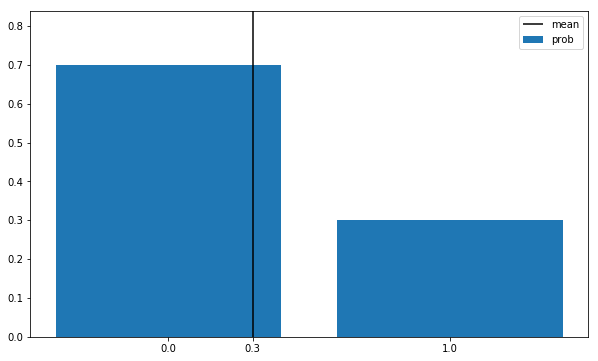

In [13]:
# ベルヌーイ分布
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1 - p) ** (1 - x)
        else:
            return 0
        
    return x_set, f

p = 0.3
X = Bern(p)

check_prob(X)
plot_prob(X)

In [14]:
# 確率変数
rv = stats.bernoulli(p)

In [15]:
# 確率関数
rv.pmf(0), rv.pmf(1)

(0.7000000000000001, 0.3)

In [16]:
# 確率関数
rv.pmf([0, 1])

array([0.7, 0.3])

In [17]:
# 累積密度関数
rv.cdf([0, 1])

array([0.7, 1. ])

In [18]:
# 期待値、分散
rv.mean(), rv.var()

(0.3, 0.21)

期待値は3.0
分散は2.1


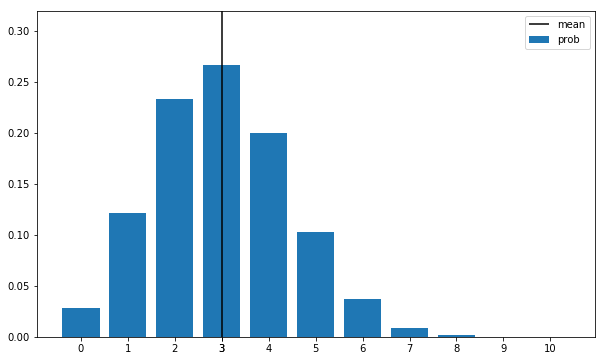

In [19]:
# 二項分布
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n + 1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p ** x * (1 - p) ** (n - x)
        else:
            return 0
    return x_set, f

n = 10
p = 0.3
X = Bin(n, p)

check_prob(X)
plot_prob(X)

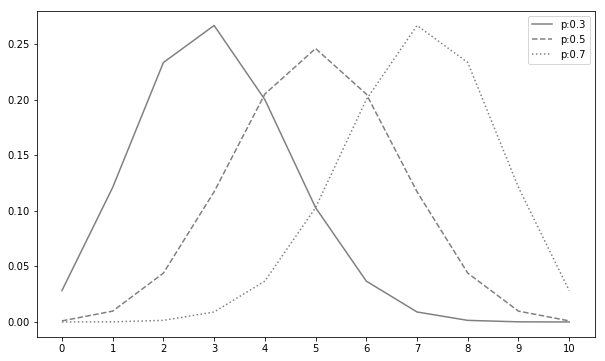

In [21]:
# pを変化させる
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n + 1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', ls=ls, color='gray')
    
ax.set_xticks(x_set)
ax.legend()
plt.show()